In [88]:
#!/usr/bin/env python3
import uproot
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import awkward as ak
import time

# Record the start time
start_time = time.perf_counter()
print("Starting analysis...")
# HZ4Lep = uproot.open("hz_hMuE_LFV.root")
HZ4Lep = uproot.open("hz_hww_4l.root")
HZ4Lep_tree = HZ4Lep["Delphes"]
column_arrays = ["MissingET_size","MissingET.Eta","MissingET.Phi","Jet_size","Electron_size","Electron.PT","Electron.Eta","Electron.Phi","Muon_size","Muon.Eta","Muon.Phi"]
HZ4Lep_array = HZ4Lep_tree.arrays(column_arrays, entry_stop=None)

Starting analysis...


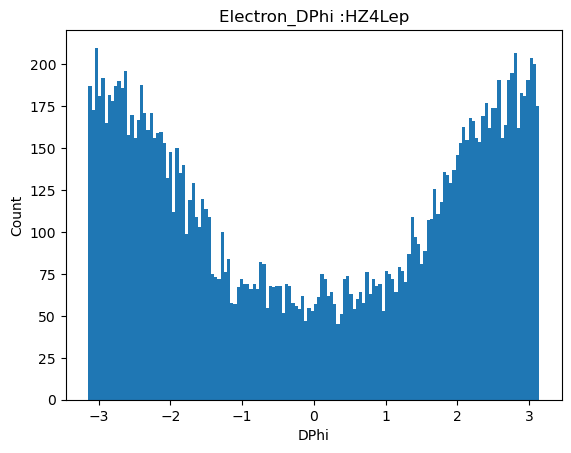

In [89]:
def simple_phiDiffplot(array,name):
    n_array = ak.flatten(array)
    n_array = (n_array + np.pi) % (2 * np.pi) - np.pi  # Normalize to [-π, π]
    # n_array = ak.where(n_array > np.pi, n_array - 2 * np.pi, n_array)
    # n_array = ak.where(n_array < -np.pi, n_array + 2 * np.pi, n_array)
    fig=plt.figure()
    ax=fig.add_subplot(111)
    ax.hist(n_array, bins=140, range=(-np.pi, np.pi))
    ax.set_title(f"Electron_DPhi :{name}")
    ax.set_xlabel("DPhi")
    ax.set_ylabel("Count")
    # plt.savefig(f"Electron_DPhi_{name}.png")
    plt.show()
    plt.close()

simple_phiDiffplot(ak.firsts(HZ4Lep_array["MissingET.Phi"])-HZ4Lep_array["Electron.Phi"],"HZ4Lep")